In [58]:
# https://www.youtube.com/watch?v=tGpMb8R9D9M&t=994s


In [59]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import os
import matplotlib.pyplot as plt


In [73]:
def gartley():

    price = df.Close.copy()

    ertiyab = 0.1

    for i in range(100, len(price)):
        max_idx = list(argrelextrema(price.values[:i], np.greater, order=5)[0])
        min_idx = list(argrelextrema(price.values[:i], np.less, order=5)[0])
        # print(max_idx)
        # print(min_idx)

        # from ordinal position get index
        # max_idx = df.index[max_idx]

        idx = max_idx + min_idx + [len(price.values[:i]) - 1]
        idx.sort()

        current_idx = idx[-5:]
        current_pat = price.values[current_idx]

        start = min(current_idx)
        end = max(current_idx)

        # peaks = price.values[idx]

        if len(current_idx) == 5:

            XA = current_pat[1] - current_pat[0]
            AB = current_pat[2] - current_pat[1]
            BC = current_pat[3] - current_pat[2]
            CD = current_pat[4] - current_pat[3]

            if XA>0 and AB<0 and BC>0 and CD<0 :
                # Bulish Gartley
                AB_range = np.array([0.618 - ertiyab, 0.618 + ertiyab ])*abs(XA)
                BC_range = np.array([0.382 - ertiyab, 0.886 + ertiyab ])*abs(AB)
                CD_range = np.array([1.27 - ertiyab, 1.618 + ertiyab ])*abs(BC)

                # wont work correctly if:
                # plt.plot(price)

                # plt.plot(price.values[:i]) # x values are the ordinal position par default
                # plt.scatter(idx,peaks,c='r')

                if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
                    
                    # avoid index getting out of range 
                    a=33 # how many candle after the pattern to be shown
                    if i+a < 999:
                        plt.plot(np.arange(start, i+a), price.values[start:i+a])
                        plt.plot(current_idx, current_pat, c='r')
                        plt.show()
                    else:
                        plt.plot(np.arange(start, 998), price.values[start:998])
                        plt.plot(current_idx, current_pat, c='r')
                        plt.show()





In [61]:
# # troubleshooting

# df = pd.read_csv(f"C:\\Users\Grant\Desktop\work_git\work\data\\4h\BNXUSDT_4h.csv")

# df.Time = pd.to_datetime(df.Time, format='%Y.%m.%d %H:%M:%S.%f')
# df = df.set_index(df.Time)

# # price = df.Close.iloc[:500]
# price = df.Close.copy()

# price


# ertiyab = 0.1

# for i in range(100, len(price)):
#     max_idx = list(argrelextrema(price.values[:i], np.greater, order=10)[0])
#     min_idx = list(argrelextrema(price.values[:i], np.less, order=10)[0])
#     # print(max_idx)
#     # print(min_idx)

#     # from ordinal position get index
#     # max_idx = df.index[max_idx]

#     idx = max_idx + min_idx + [len(price.values[:i]) - 1]
#     idx.sort()

#     current_idx = idx[-5:]
#     current_pat = price.values[current_idx]

#     start = min(current_idx)
#     end = max(current_idx)


#     peaks = price.values[idx]



#     # XA = current_pat[1] - current_pat[0]
#     # AB = current_pat[2] - current_pat[1]
#     # BC = current_pat[3] - current_pat[2]
#     # CD = current_pat[4] - current_pat[3]

#     plt.plot(price.values[:i]) # x values are the ordinal position par default
#     plt.scatter(idx,peaks,c='r')
#     plt.show()

#     # print(idx)


# '''the order of argrelextrema changes the number of detected peaks
# its a consequence of order = 10 that the first chart has 5 peaks
# in chart 7 we find that the last two peks merges together 
# thats the error source, wich is not an error its normal behavior
# solution 
# if len(current_idx) == 5:
# '''

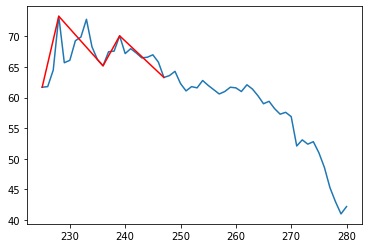

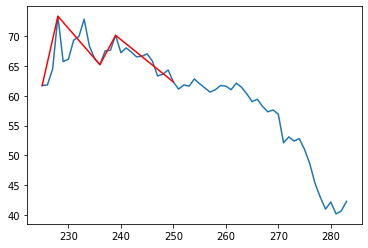

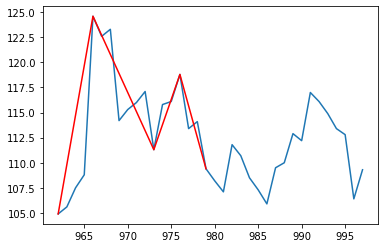

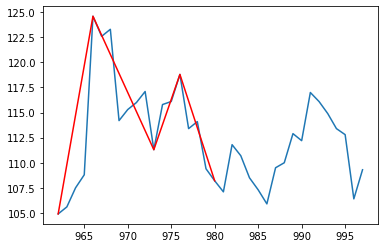

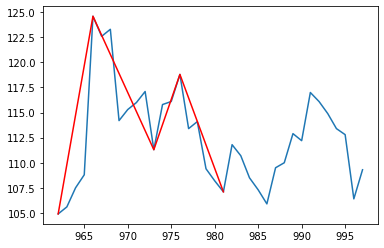

In [74]:
# Test one pair

df = pd.read_csv(f"C:\\Users\Grant\Desktop\work_git\work\data\\4h\BNXUSDT_4h.csv")

df.Time = pd.to_datetime(df.Time, format='%Y.%m.%d %H:%M:%S.%f')
df = df.set_index(df.Time)

# price = df.Close.iloc[:500]
# price = df.Close.copy()

gartley()



1INCHUSDT_4h.csv
AAVEUSDT_4h.csv
ACAUSDT_4h.csv
ACHUSDT_4h.csv
ACMUSDT_4h.csv
ADAUSDT_4h.csv
ADXUSDT_4h.csv
AGLDUSDT_4h.csv
AIONUSDT_4h.csv
AKROUSDT_4h.csv
ALCXUSDT_4h.csv
ALGOUSDT_4h.csv
ALICEUSDT_4h.csv
ALPACAUSDT_4h.csv
ALPHAUSDT_4h.csv
ALPINEUSDT_4h.csv


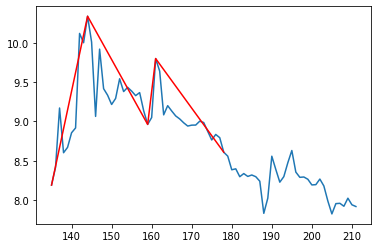

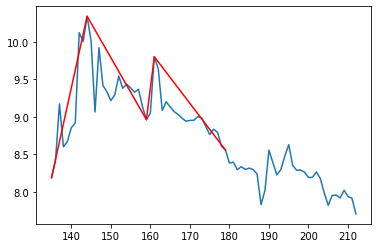

AMPUSDT_4h.csv
ANCUSDT_4h.csv
ANKRUSDT_4h.csv


ValueError: x and y must have same first dimension, but have shapes (51,) and (30,)

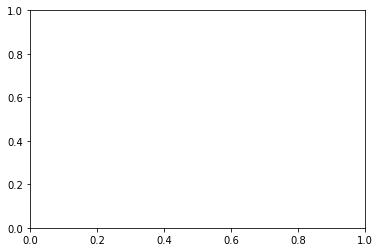

In [47]:
# test all pairs

# list_of=[]
timeframe='4h'

outdir=f"{os.getcwd()}/data/{timeframe}"

for filename in os.listdir(outdir):
    # symbol = filename.replace(f"_{timeframe}.csv","")
    df = pd.read_csv(f"{outdir}/{filename}")
    df.Time = pd.to_datetime(df.Time, format='%Y.%m.%d %H:%M:%S.%f')
    df = df.set_index(df.Time)

    # price = df.Close.iloc[:500]
    
    print(filename)

    gartley()